In [36]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import os

In [37]:
df = pd.read_csv('../MDL_SMPL.CSV')
df

,CUST,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,LTV,MDL_YR,EXTSN_CN,COBUYER_CUSTOM_CREDIT_SCORE,...,BANK_REVOLVING_TRADE_COUNT,DEROGATORY_PUBLIC_RECORD_COUNT,Dlnqnt_10_29_Cnt,Dlnqnt_30_59_Cnt,Dlnqnt_60_89_Cnt,Dlnqnt_90_Cnt,Eom_Bal,BOM_BAL,CALL_DPD,CALL_START_DATE
0,65,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,0,...,0,1,0,0,0,0,21583.10,21583.10,9,NaN
1,65,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,0,...,0,1,0,0,0,0,21583.10,21583.10,9,NaN
2,65,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,0,...,0,1,0,0,0,0,21583.10,21583.10,9,NaN
3,65,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,0,...,0,1,0,0,0,0,21583.10,21583.10,9,NaN
4,65,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,0,...,0,1,0,0,0,0,21583.10,21583.10,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046191,9997882,04JAN2021,851,39189.00,630.60,72,1.23,2021,0,550,...,5,0,14,4,1,0,26798.12,27274.93,6,1.938688e+09
2046192,9998021,05JAN2021,666,57035.16,678.99,84,1.14,2020,1,638,...,9,5,2,0,0,0,38678.17,39358.17,5,1.962371e+09
2046193,9998700,28DEC2020,756,33736.00,621.68,75,1.32,2020,4,577,...,0,0,19,15,5,1,27398.39,27398.39,21,1.990858e+09
2046194,9999212,19SEP2022,745,34320.99,555.58,75,1.19,2022,0,0,...,3,0,0,0,0,0,32391.29,32761.32,10,1.993291e+09


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046196 entries, 0 to 2046195
Data columns (total 68 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CUST                              int64  
 1   BOOK_DT                           object 
 2   FICO                              int64  
 3   ORIGINAL_LOAN_AMOUNT              float64
 4   TOT_MO_PMT                        float64
 5   TERM                              int64  
 6   LTV                               float64
 7   MDL_YR                            int64  
 8   EXTSN_CN                          int64  
 9   COBUYER_CUSTOM_CREDIT_SCORE       int64  
 10  BUYER_CUSTOM_CREDIT_SCORE         int64  
 11  TOTAL_INCOME_AMOUNT               float64
 12  DISPOSABLE_INCOME_AMOUNT          float64
 13  BUYER_CREDIT_SCORE                int64  
 14  COBUYER_CREDIT_SCORE              int64  
 15  INSTALLMENT_TRADE_PERCENT         float64
 16  ORIGINAL_COMBINED_DEBT_TO_INCOME  fl

In [38]:
df = df.dropna()

In [39]:
df['Change_balance'] = df['Eom_Bal'] - df['BOM_BAL']
df['outcome'] = np.where(df['Change_balance'] < 0, 1, 0)
# df = df.drop(['Change_balance', 'Eom_Bal', 'BOM_BAL'], axis=1)

C:\Users\rheah\AppData\Local\Temp\ipykernel_14832\4185971376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change_balance'] = df['Eom_Bal'] - df['BOM_BAL']
C:\Users\rheah\AppData\Local\Temp\ipykernel_14832\4185971376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome'] = np.where(df['Change_balance'] < 0, 1, 0)


In [42]:
df[df['CUST'] == 5204][['CUST', 'CALL_START_DATE', 'BOM_BAL', 'Eom_Bal', 'Change_balance', 'outcome']]

,CUST,CALL_START_DATE,BOM_BAL,Eom_Bal,Change_balance,outcome
2859,5204,1.830614e+09,52709.23,51696.85,-1012.38,1
2860,5204,1.831116e+09,52709.23,51696.85,-1012.38,1
2861,5204,1.831118e+09,52709.23,51696.85,-1012.38,1
2862,5204,1.831377e+09,52709.23,51696.85,-1012.38,1
2863,5204,1.832236e+09,52709.23,51696.85,-1012.38,1
...,...,...,...,...,...,...
1888399,5204,1.990720e+09,7501.28,7501.28,0.00,0
1888400,5204,1.990720e+09,7501.28,7501.28,0.00,0
1888401,5204,1.990720e+09,7501.28,7501.28,0.00,0
1888402,5204,1.990720e+09,7501.28,7501.28,0.00,0


In [41]:
df[df['CUST'] == 5204][['CUST', 'Dlnqnt_10_29_Cnt', 'Dlnqnt_30_59_Cnt', 'Dlnqnt_60_89_Cnt', 'Dlnqnt_90_Cnt', 'outcome']]

,CUST,Dlnqnt_10_29_Cnt,Dlnqnt_30_59_Cnt,Dlnqnt_60_89_Cnt,Dlnqnt_90_Cnt,outcome
2859,5204,15,8,2,0,1
2860,5204,15,8,2,0,1
2861,5204,15,8,2,0,1
2862,5204,15,8,2,0,1
2863,5204,15,8,2,0,1
...,...,...,...,...,...,...
1888399,5204,48,29,3,0,0
1888400,5204,48,29,3,0,0
1888401,5204,48,29,3,0,0
1888402,5204,48,29,3,0,0


In [23]:
import missingno as msno

In [24]:
from datetime import datetime
df['CALL_START_DATE'] = df['CALL_START_DATE'].apply(lambda x: datetime.utcfromtimestamp(x))

# Variable Selection

## 1. remove null variables

In [25]:
df_select = df.copy()
df_select.drop(columns=['BOOK_DT', "CALL_START_DATE", "CUST"], inplace = True)

In [26]:
percentage_null = df_select.isnull().mean().sort_values(ascending=False).reset_index()
percentage_null.columns = ['variable', 'null percentage']
display(percentage_null)

,variable,null percentage
0,FICO,0.0
1,ORIGINAL_LOAN_AMOUNT,0.0
2,MONTHLY_BALANCE_TOTAL_AMOUNT,0.0
3,MONTHLY_INSTALLMENTS_TOTAL_AMOUN,0.0
4,MORTGAGE_PAYMENT_TOTAL_AMOUNT,0.0
...,...,...
59,EVER_TRADE_PERCENT,0.0
60,FINANCE_COMPANY_TRADE_LINE_COUNT,0.0
61,HIGHEST_LOAN_AMOUNT,0.0
62,INSTALLMENT_TRADE_COUNT,0.0


## 2. remove highly correlated variables

In [8]:
correlation_matrix = df_select.corr()
feature_correlation_threshold = 0.90  

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(INSTALLMENT_TRADE_PERCENT) - (INSTALLMENT_TRADE_LINE_PERCENT): 0.9946969241145823
(INSTALLMENT_TRADE_LINE_PERCENT) - (INSTALLMENT_TRADE_PERCENT): 0.9946969241145823
(REVOLVING_TRADE_PERCENT) - (REVOLVING_TRADE_LINE_PERCENT): 0.991562132298263
(REVOLVING_TRADE_LINE_PERCENT) - (REVOLVING_TRADE_PERCENT): 0.991562132298263
(MONTHLY_BALANCE_TOTAL_AMOUNT) - (TOTAL_BUREAU_PAYMENT_AMOUNT): 0.9774612277681611
(TOTAL_BUREAU_PAYMENT_AMOUNT) - (MONTHLY_BALANCE_TOTAL_AMOUNT): 0.9774612277681611
(REVOLVING_CREDIT_BALANCE_RATIO) - (REVOLVING_TRADE_LINE_PERCENT): 0.9758245797701164
(REVOLVING_TRADE_LINE_PERCENT) - (REVOLVING_CREDIT_BALANCE_RATIO): 0.9758245797701164
(REVOLVING_CREDIT_BALANCE_RATIO) - (REVOLVING_TRADE_PERCENT): 0.9664260331129881
(REVOLVING_TRADE_PERCENT) - (REVOLVING_CREDIT_BALANCE_RATIO): 0.9664260331129881
(TRADE_LINES_RATED_COUNT) - (TRADE_LINE_COUNT): 0.9621478212339838
(TRADE_LINE_COUNT) - (TRADE_LINES_RATED_COUNT): 0.9621478212339838
(COBUYER_CREDIT_SC

In [27]:
df_select = df_select.drop(['INSTALLMENT_TRADE_LINE_PERCENT', 'REVOLVING_TRADE_LINE_PERCENT', 'MONTHLY_BALANCE_TOTAL_AMOUNT', 'REVOLVING_CREDIT_BALANCE_RATIO', 'TRADE_LINES_RATED_COUNT', 'REVOLVING_SATISFACTORY_ACCOUNT_C', 'DEPARTMENT_STORE_TRADE_COUNT'], axis=1)

In [28]:
new_column_order = ['CUST', 'CALL_START_DATE', 'BOOK_DT'] + df_select.columns.tolist()

df_select = df[new_column_order]
df_select


,CUST,CALL_START_DATE,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,LTV,MDL_YR,EXTSN_CN,...,TRADE_LINE_COUNT,AUTHORIZED_USER_TRADE_PERCENT,BANK_REVOLVING_TRADE_COUNT,DEROGATORY_PUBLIC_RECORD_COUNT,Dlnqnt_10_29_Cnt,Dlnqnt_30_59_Cnt,Dlnqnt_60_89_Cnt,Dlnqnt_90_Cnt,CALL_DPD,outcome
28,65,2028-09-12 10:48:17,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,4,0.0,0,1,0,0,0,0,9,0
29,65,2028-09-13 12:08:28,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,4,0.0,0,1,0,0,0,0,9,0
30,65,2028-09-14 11:35:41,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,4,0.0,0,1,0,0,0,0,9,0
31,65,2028-09-18 10:57:40,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,4,0.0,0,1,0,0,0,0,9,0
32,65,2028-09-18 13:42:26,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,4,0.0,0,1,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046191,9997882,2031-06-08 12:31:29,04JAN2021,851,39189.00,630.60,72,1.23,2021,0,...,26,0.0,5,0,14,4,1,0,6,1
2046192,9998021,2032-03-08 15:10:14,05JAN2021,666,57035.16,678.99,84,1.14,2020,1,...,25,6.0,9,5,2,0,0,0,5,1
2046193,9998700,2033-02-01 08:07:19,28DEC2020,756,33736.00,621.68,75,1.32,2020,4,...,51,0.0,0,0,19,15,5,1,21,0
2046194,9999212,2033-03-01 11:58:11,19SEP2022,745,34320.99,555.58,75,1.19,2022,0,...,7,14.0,3,0,0,0,0,0,10,1


In [29]:
df_select = df_select.dropna()

# Variable Creation
o   Average of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Maximum of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Minimum of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Average of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Maximum of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Minimum of Buyer_Credit_Score and Cobuyer_Credit_Score

o   Days since last calls in the previous months

o   Days between the first call and last call

In [30]:
df_select['avg_buyer_cobuyer_credit'] = (df_select['BUYER_CREDIT_SCORE'] + df_select['COBUYER_CREDIT_SCORE']) / 2
df_select['max_buyer_cobuyer_credit'] = df_select[['BUYER_CREDIT_SCORE', 'COBUYER_CREDIT_SCORE']].max(axis=1)
df_select['min_buyer_cobuyer_credit'] = df_select[['BUYER_CREDIT_SCORE', 'COBUYER_CREDIT_SCORE']].min(axis=1)

df_select['avg_buyer_cobuyer_CUSTOM_credit'] = (df_select['BUYER_CUSTOM_CREDIT_SCORE'] + df_select['COBUYER_CUSTOM_CREDIT_SCORE']) / 2
df_select['max_buyer_cobuyer_CUSTOM_credit'] = df_select[['BUYER_CUSTOM_CREDIT_SCORE', 'COBUYER_CUSTOM_CREDIT_SCORE']].max(axis=1)
df_select['min_buyer_cobuyer_CUSTOM_credit'] = df_select[['BUYER_CUSTOM_CREDIT_SCORE', 'COBUYER_CUSTOM_CREDIT_SCORE']].min(axis=1)


since sometimes cobuyer credit score is not recorded (0), it is safer to use max of buyer and cobuyer credit score

In [31]:
df_select[['avg_buyer_cobuyer_credit', 'BUYER_CREDIT_SCORE', 'COBUYER_CREDIT_SCORE']]

,avg_buyer_cobuyer_credit,BUYER_CREDIT_SCORE,COBUYER_CREDIT_SCORE
28,282.5,565,0
29,282.5,565,0
30,282.5,565,0
31,282.5,565,0
32,282.5,565,0
...,...,...,...
2046191,710.5,851,570
2046192,665.0,666,664
2046193,647.0,756,538
2046194,372.5,745,0


In [32]:
df_select = df_select.drop(['max_buyer_cobuyer_credit', 'min_buyer_cobuyer_credit', 'max_buyer_cobuyer_CUSTOM_credit', 'min_buyer_cobuyer_CUSTOM_credit'], axis=1)

# Reduce to one record per customer (keep the last one)

In [33]:
df_reduced_temp = df_select.sort_values(by=['CUST', 'CALL_START_DATE'])

# Days since last call in the previous months
# first calculate the difference between consecutive calls for each customer
df_reduced_temp['DAYS_DIFF'] = df_reduced_temp.groupby('CUST')['CALL_START_DATE'].diff().dt.days
df_reduced_temp['DAYS_SINCE_LAST_CALL'] = df_reduced_temp.groupby('CUST')['DAYS_DIFF'].shift(-1)

# Days between the first call and last call
df_reduced_temp['DAYS_BETWEEN_FIRST_LAST'] = df_reduced_temp.groupby('CUST')['CALL_START_DATE'].transform('last') - df_reduced_temp.groupby('CUST')['CALL_START_DATE'].transform('first')
df_reduced_temp['DAYS_BETWEEN_FIRST_LAST'] = df_reduced_temp['DAYS_BETWEEN_FIRST_LAST'].dt.days

# Reduce the dataset
df_reduced = df_reduced_temp.groupby(['CUST']).last().drop(columns=['DAYS_DIFF']).reset_index()
df_reduced

,CUST,CALL_START_DATE,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,LTV,MDL_YR,EXTSN_CN,...,Dlnqnt_10_29_Cnt,Dlnqnt_30_59_Cnt,Dlnqnt_60_89_Cnt,Dlnqnt_90_Cnt,CALL_DPD,outcome,avg_buyer_cobuyer_credit,avg_buyer_cobuyer_CUSTOM_credit,DAYS_SINCE_LAST_CALL,DAYS_BETWEEN_FIRST_LAST
0,65,2029-05-07 18:53:55,12JUN2018,565,22686.13,525.64,72,0.98,2017,0,...,0,0,0,0,9,0,282.5,276.5,3.0,237
1,294,2029-05-31 12:47:27,15JUN2018,620,30673.14,553.29,72,1.21,2018,0,...,0,0,0,0,8,1,582.0,644.5,23.0,423
2,341,2029-05-31 15:39:51,26MAY2017,720,18514.35,304.06,72,1.39,2016,0,...,7,0,0,0,21,1,636.0,640.0,7.0,512
3,368,2029-05-20 07:07:07,06FEB2014,587,24457.64,439.52,72,1.48,2014,0,...,31,4,0,0,5,1,293.5,287.0,2.0,502
4,409,2029-05-29 18:25:41,16NOV2017,566,19520.02,507.36,48,1.13,2015,0,...,12,5,0,0,11,1,562.0,574.0,8.0,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60416,9997882,2031-10-31 08:21:52,04JAN2021,851,39189.00,630.60,72,1.23,2021,0,...,14,4,1,0,6,1,710.5,654.5,127.0,144
60417,9998021,2032-08-16 12:34:48,05JAN2021,666,57035.16,678.99,84,1.14,2020,1,...,2,0,0,0,5,1,665.0,662.0,6.0,160
60418,9998700,2033-03-17 13:57:01,28DEC2020,756,33736.00,621.68,75,1.32,2020,4,...,19,15,5,1,21,0,647.0,631.5,1.0,44
60419,9999212,2033-04-26 12:00:47,19SEP2022,745,34320.99,555.58,75,1.19,2022,0,...,0,0,0,0,10,1,372.5,354.0,56.0,56


In [84]:
df[df['CUST'] == 409][['CUST', 'CALL_START_DATE', 'BOOK_DT', 'ORIGINAL_LOAN_AMOUNT', 'Dlnqnt_10_29_Cnt', 'Dlnqnt_30_59_Cnt', 'Dlnqnt_60_89_Cnt', 'Dlnqnt_90_Cnt', 'outcome']]

,CUST,CALL_START_DATE,BOOK_DT,ORIGINAL_LOAN_AMOUNT,Dlnqnt_10_29_Cnt,Dlnqnt_30_59_Cnt,Dlnqnt_60_89_Cnt,Dlnqnt_90_Cnt,outcome
438,409,2028-01-03 11:35:00,16NOV2017,19520.02,12,5,0,0,1
439,409,2028-01-04 11:21:47,16NOV2017,19520.02,12,5,0,0,1
440,409,2028-01-05 11:28:24,16NOV2017,19520.02,12,5,0,0,1
441,409,2028-01-06 10:42:25,16NOV2017,19520.02,12,5,0,0,1
442,409,2028-01-09 13:13:22,16NOV2017,19520.02,12,5,0,0,1
...,...,...,...,...,...,...,...,...,...
1025800,409,2029-03-20 13:01:35,16NOV2017,19520.02,12,5,0,0,1
1025803,409,2029-03-21 13:21:47,16NOV2017,19520.02,12,5,0,0,1
1025804,409,2029-03-22 17:32:37,16NOV2017,19520.02,12,5,0,0,1
1025805,409,2029-03-26 07:46:57,16NOV2017,19520.02,12,5,0,0,1


In [34]:
df_reduced = df_reduced.drop(['CALL_START_DATE', 'BOOK_DT'], axis=1)
df_reduced = df_reduced.dropna()

In [35]:
df_reduced['outcome'].value_counts()

1    42221
0    16115
Name: outcome, dtype: int64

In [71]:
import pickle

file_path = './data/df_reduced_new.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(df_reduced, f)

In [79]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58336 entries, 0 to 60420
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST                              58336 non-null  int64  
 1   FICO                              58336 non-null  int64  
 2   ORIGINAL_LOAN_AMOUNT              58336 non-null  float64
 3   TOT_MO_PMT                        58336 non-null  float64
 4   TERM                              58336 non-null  int64  
 5   LTV                               58336 non-null  float64
 6   MDL_YR                            58336 non-null  int64  
 7   EXTSN_CN                          58336 non-null  int64  
 8   COBUYER_CUSTOM_CREDIT_SCORE       58336 non-null  int64  
 9   BUYER_CUSTOM_CREDIT_SCORE         58336 non-null  int64  
 10  TOTAL_INCOME_AMOUNT               58336 non-null  float64
 11  DISPOSABLE_INCOME_AMOUNT          58336 non-null  float64
 12  BUYE

# Feature importance selection

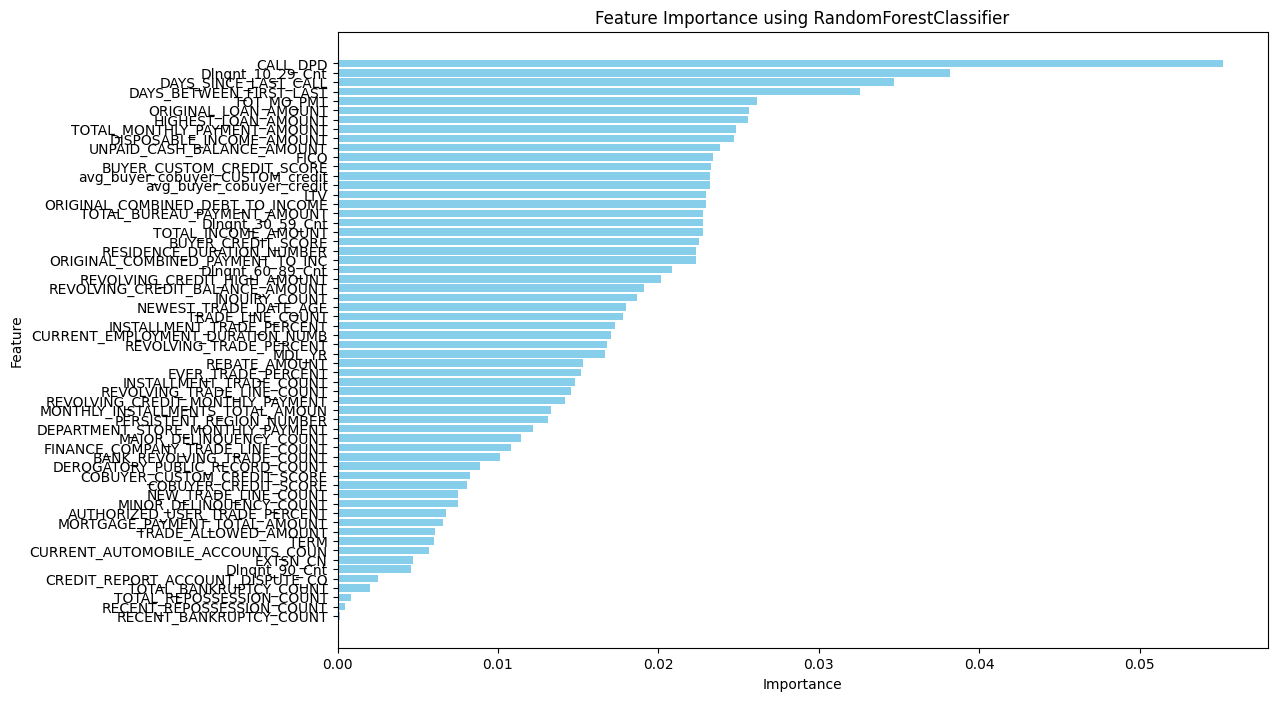

In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

target_variable = 'outcome'

features = df_reduced.drop(columns=[target_variable, 'CUST'])
target = df_reduced[target_variable]

# Create a StandardScaler object
scaler = StandardScaler()

# Standard scale the features
scaled_features = scaler.fit_transform(features)

# Create a RandomForestClassifier with the scaled features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(scaled_features, target)
importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()


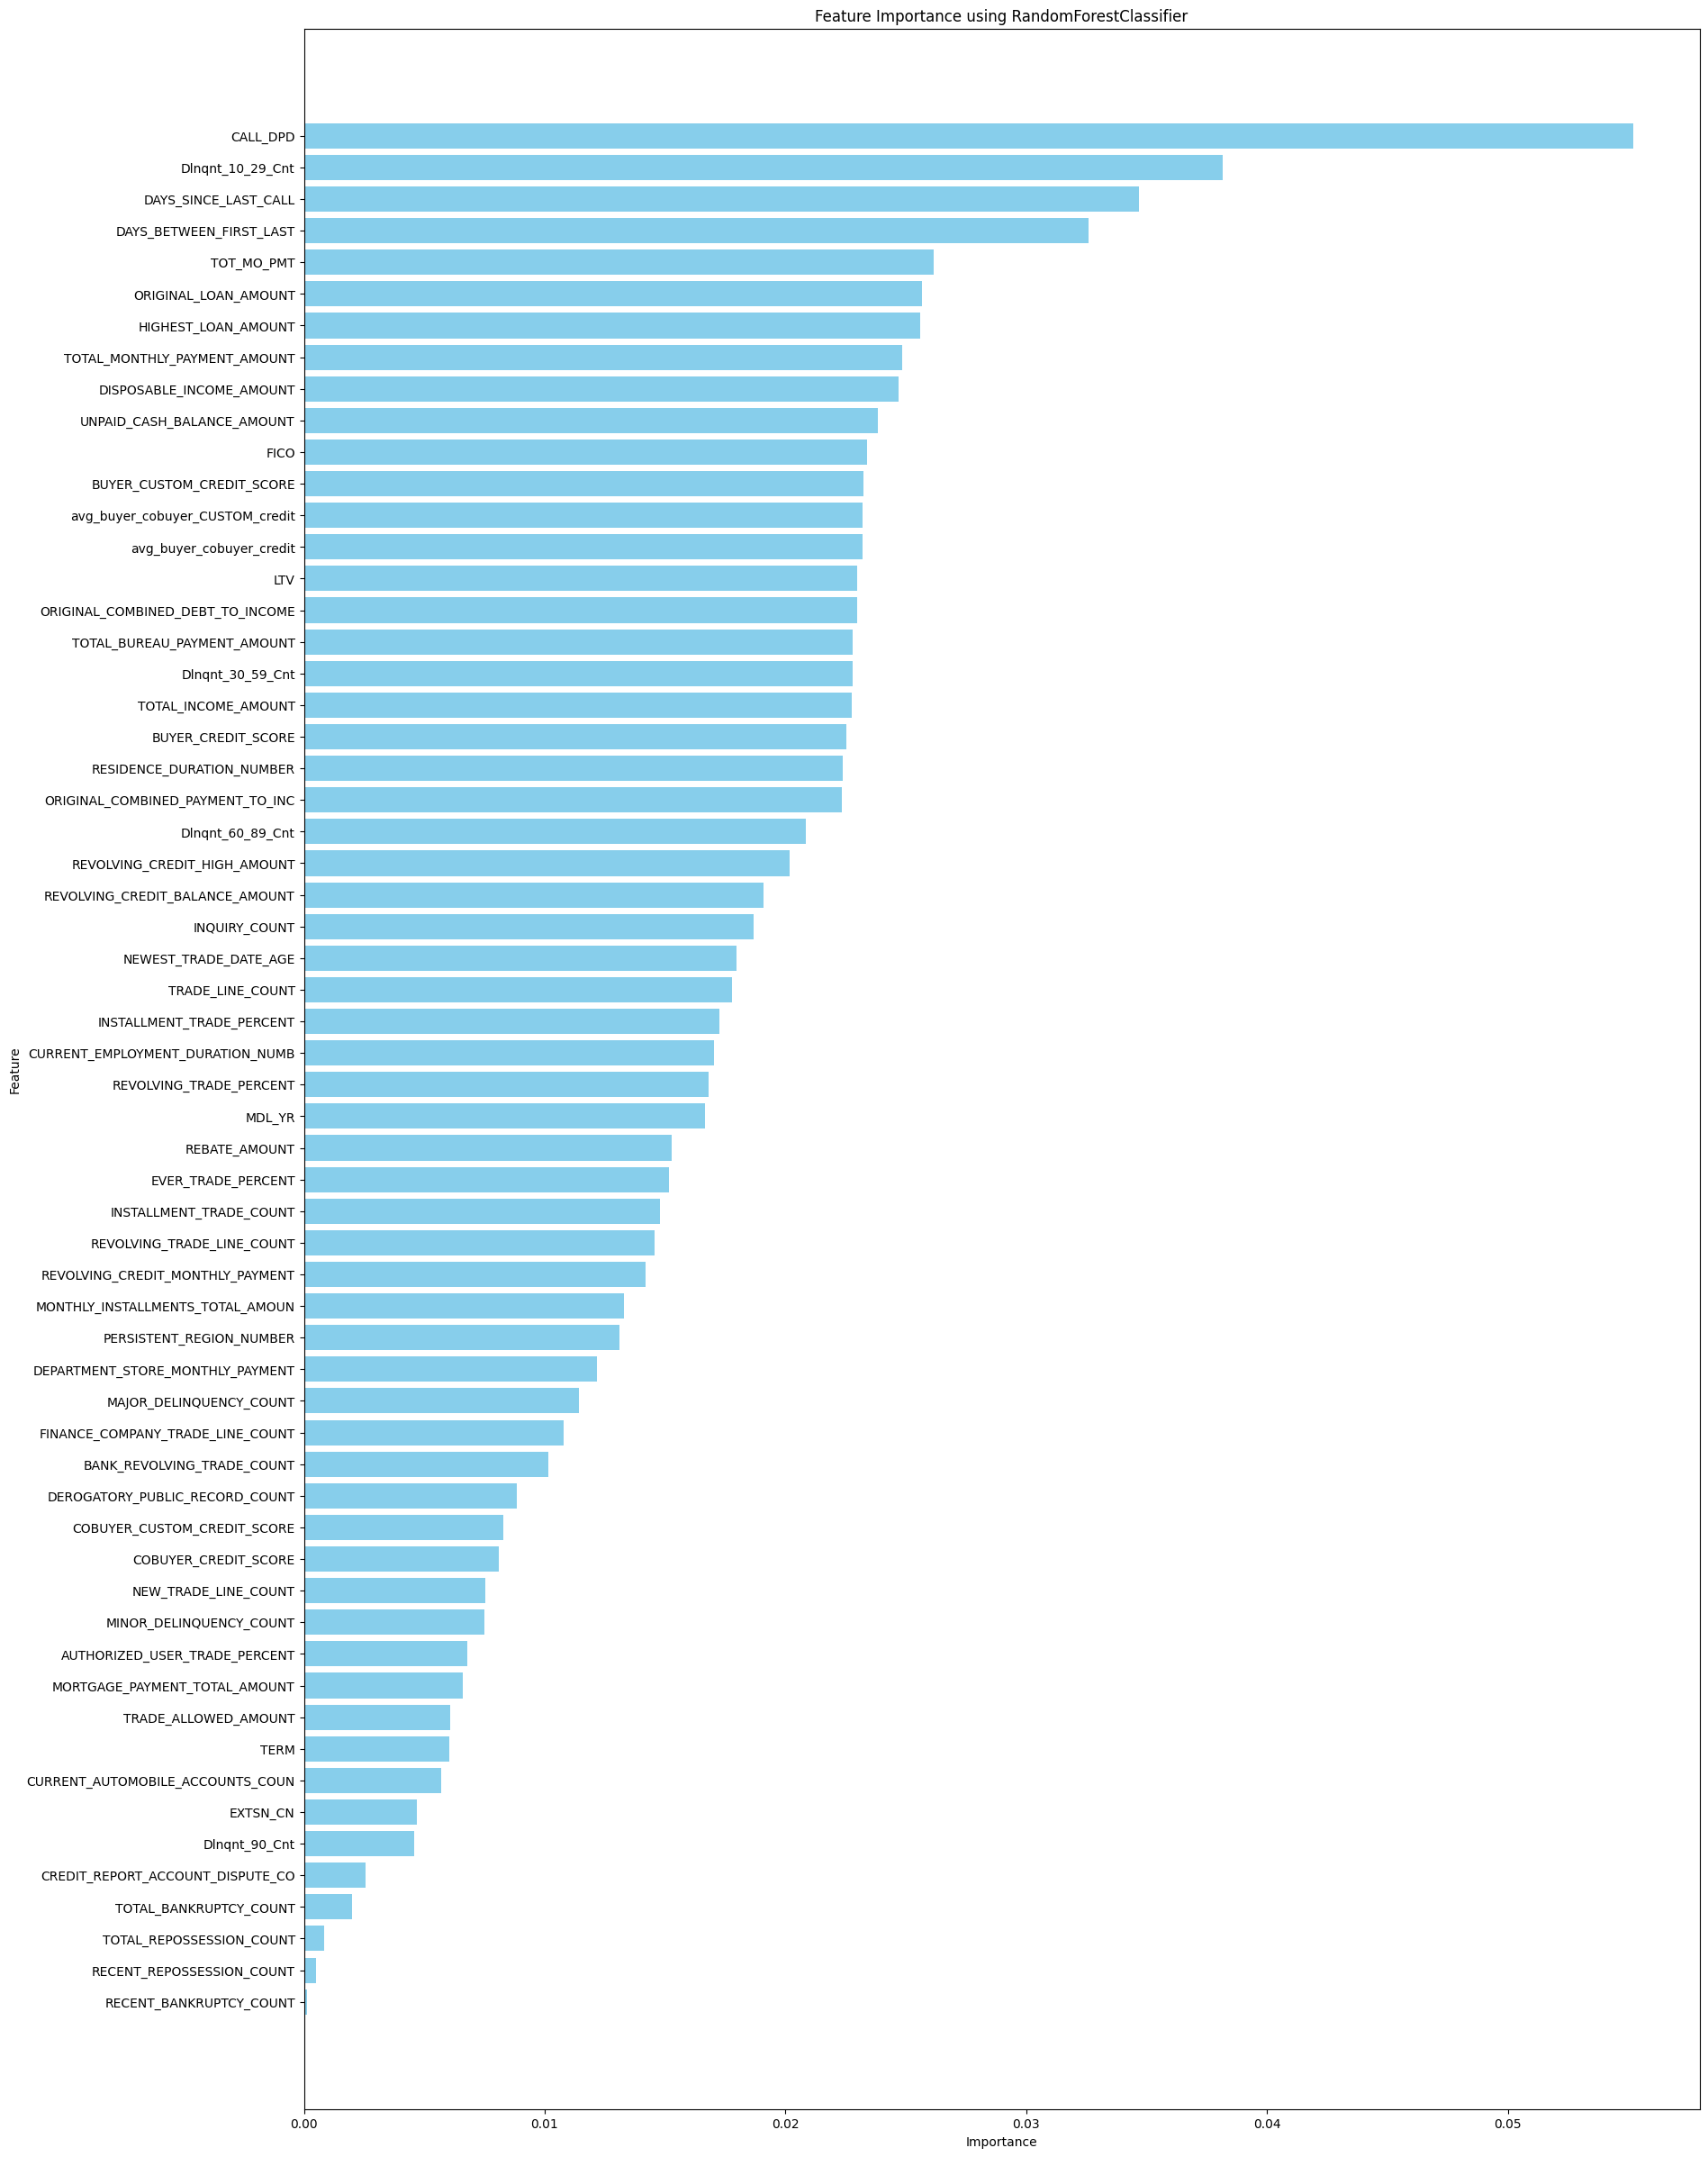

In [74]:
plt.figure(figsize=(20,30))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()


In [99]:
feature_importance_df['Feature'].tolist()

['CALL_DPD',
 'Dlnqnt_10_29_Cnt',
 'DAYS_SINCE_LAST_CALL',
 'DAYS_BETWEEN_FIRST_LAST',
 'TOT_MO_PMT',
 'ORIGINAL_LOAN_AMOUNT',
 'HIGHEST_LOAN_AMOUNT',
 'TOTAL_MONTHLY_PAYMENT_AMOUNT',
 'DISPOSABLE_INCOME_AMOUNT',
 'UNPAID_CASH_BALANCE_AMOUNT',
 'FICO',
 'BUYER_CUSTOM_CREDIT_SCORE',
 'avg_buyer_cobuyer_CUSTOM_credit',
 'avg_buyer_cobuyer_credit',
 'LTV',
 'ORIGINAL_COMBINED_DEBT_TO_INCOME',
 'TOTAL_BUREAU_PAYMENT_AMOUNT',
 'Dlnqnt_30_59_Cnt',
 'TOTAL_INCOME_AMOUNT',
 'BUYER_CREDIT_SCORE',
 'RESIDENCE_DURATION_NUMBER',
 'ORIGINAL_COMBINED_PAYMENT_TO_INC',
 'Dlnqnt_60_89_Cnt',
 'REVOLVING_CREDIT_HIGH_AMOUNT',
 'REVOLVING_CREDIT_BALANCE_AMOUNT',
 'INQUIRY_COUNT',
 'NEWEST_TRADE_DATE_AGE',
 'TRADE_LINE_COUNT',
 'INSTALLMENT_TRADE_PERCENT',
 'CURRENT_EMPLOYMENT_DURATION_NUMB',
 'REVOLVING_TRADE_PERCENT',
 'MDL_YR',
 'REBATE_AMOUNT',
 'EVER_TRADE_PERCENT',
 'INSTALLMENT_TRADE_COUNT',
 'REVOLVING_TRADE_LINE_COUNT',
 'REVOLVING_CREDIT_MONTHLY_PAYMENT',
 'MONTHLY_INSTALLMENTS_TOTAL_AMOUN',
 'PER